*- Mhariadora Bocalbos: Educational Attainment Data
- Qi Sun: Student enrollment data for different institutions in the academic year of 2016/2017
- Evelyn Yoon: Student Test Data
- Avi Marcus: County College Grad/Jobs Data
- Olga Kriyokov: UN International Migrant Data
- Minyeong Han: Candy Data
- Jacob Goodman: Polling Data
- Jeeho Bae: User Review Data
- Natan Bienstock: Student Test Data*

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

***Task 1***

In [18]:
#using Evelyn's dataset and upload to GitHub
ee=pd.read_csv('https://raw.githubusercontent.com/ak47m1a1/DBDA-python/master/Evelyn.csv')
ee

,Student,Physics,Chemistry,English,Math
0,John,78,79,56,95
1,Alice,58,72,91,81
2,Rachel,22,61,88,64
3,Tom,78,89,56,83


In [19]:
#Using melt function change wide format to long format
ee1=pd.melt(ee,id_vars=['Student'],value_vars=['Physics','Chemistry','English','Math'])
ee1

,Student,variable,value
0,John,Physics,78
1,Alice,Physics,58
2,Rachel,Physics,22
3,Tom,Physics,78
4,John,Chemistry,79
5,Alice,Chemistry,72
6,Rachel,Chemistry,61
7,Tom,Chemistry,89
8,John,English,56
9,Alice,English,91


In [20]:
#rename columns' name
ee1.rename(columns={'variable':'Subject', 'value':'Scores'},inplace=True)
ee1

,Student,Subject,Scores
0,John,Physics,78
1,Alice,Physics,58
2,Rachel,Physics,22
3,Tom,Physics,78
4,John,Chemistry,79
5,Alice,Chemistry,72
6,Rachel,Chemistry,61
7,Tom,Chemistry,89
8,John,English,56
9,Alice,English,91


In [21]:
#Answering Evelyn's first question: calculate the average overall scores for each or specific person
ee2=ee1['Scores'].groupby(ee1['Student'])

In [22]:
ee2.mean()#Print result

Student
Alice     75.50
John      77.00
Rachel    58.75
Tom       76.50
Name: Scores, dtype: float64

In [33]:
#Answering second question and print: The highest or lowest scores in certain subject
ee1['Scores'].groupby(ee1['Subject']).max()

Subject
Chemistry    89
English      91
Math         95
Physics      78
Name: Scores, dtype: int64

In [34]:
ee1['Scores'].groupby(ee1['Subject']).min()

Subject
Chemistry    61
English      56
Math         64
Physics      22
Name: Scores, dtype: int64

***Task 2***

In [36]:
#create the Natan's dataset in csv and upload to GitHub
nn=pd.read_csv('https://raw.githubusercontent.com/ak47m1a1/DBDA-python/master/Natan.csv')
nn

,Name,Test 1,Test 2,Test 3,Test 4
0,Reggie Miller,97.0,80,87.0,91
1,Dan Bonner,76.0,68,80.0,81
2,Steve Smith,84.0,75,NaN,86
3,Charles Barkey,NaN,89,NaN,76
4,Kenny Smith,80.0,81,79.0,85
5,Chris Webber,75.0,75,76.0,92
6,Jalen Rose,80.0,85,84.0,83
7,Jim Jackson,92.0,91,94.0,95


In [37]:
#replace NaN to o because no matter what excuse for the student, NaN is meaning he/she absent exam and not giving reasonable
#reasons, so I assume the student's score with NaN is o.
nn1=nn.fillna(0)
nn1

,Name,Test 1,Test 2,Test 3,Test 4
0,Reggie Miller,97.0,80,87.0,91
1,Dan Bonner,76.0,68,80.0,81
2,Steve Smith,84.0,75,0.0,86
3,Charles Barkey,0.0,89,0.0,76
4,Kenny Smith,80.0,81,79.0,85
5,Chris Webber,75.0,75,76.0,92
6,Jalen Rose,80.0,85,84.0,83
7,Jim Jackson,92.0,91,94.0,95


In [79]:
#using melt to change wide to long format.
nn2=pd.melt(nn1,id_vars=['Name'],value_vars=['Test 1','Test 2','Test 3','Test 4'])
nn2.head()

,Name,variable,value
0,Reggie Miller,Test 1,97.0
1,Dan Bonner,Test 1,76.0
2,Steve Smith,Test 1,84.0
3,Charles Barkey,Test 1,0.0
4,Kenny Smith,Test 1,80.0


In [80]:
#changing the column's name
nn2.rename(columns={'variable':'Subject', 'value':'Scores'},inplace=True)
nn2.head()

,Name,Subject,Scores
0,Reggie Miller,Test 1,97.0
1,Dan Bonner,Test 1,76.0
2,Steve Smith,Test 1,84.0
3,Charles Barkey,Test 1,0.0
4,Kenny Smith,Test 1,80.0


In [81]:
# first question from Natan: Which student had the highest average test grades?
#creating average score column
nn3=nn2['Scores'].groupby(nn2['Name'])
nn4=nn3.mean().to_frame('Average score')
nn4

,Average score
Name,
Charles Barkey,41.25
Chris Webber,79.50
Dan Bonner,76.25
Jalen Rose,83.00
Jim Jackson,93.00
Kenny Smith,81.25
Reggie Miller,88.75
Steve Smith,61.25


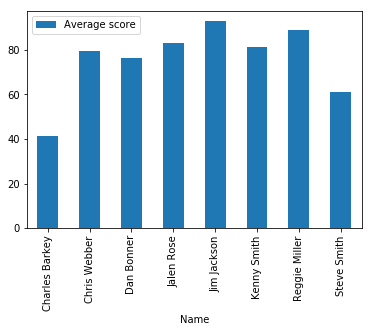

In [63]:
#using bar chart, so answer is Jim Jackson
nn4.plot.bar();

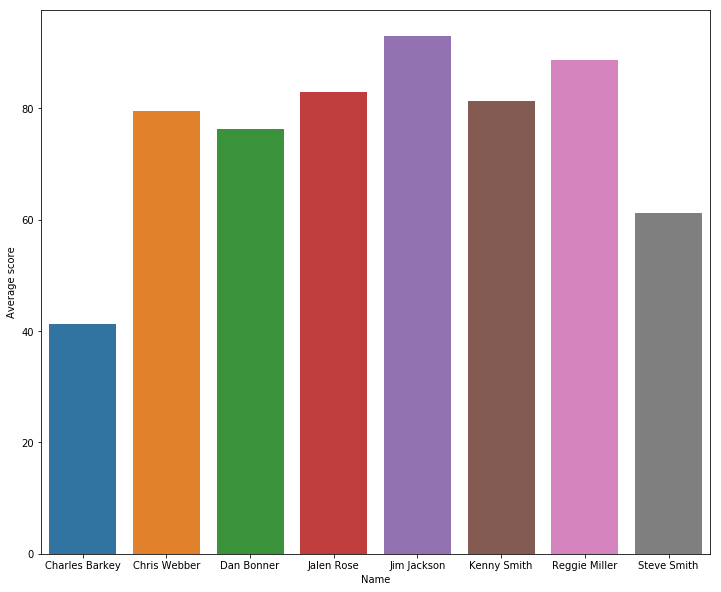

In [61]:
#another colorful barchart
plt.figure(figsize=(12,10))
sns.barplot(x=nn4.index, y='Average score', data=nn4)

In [67]:
#Natan's second question: Which student had the greatest range of test grades?
#calculating range.
aaa= nn2['Scores'].groupby(nn2['Name']).max()-nn2['Scores'].groupby(nn2['Name']).min()
aaa

Name
Charles Barkey    89.0
Chris Webber      17.0
Dan Bonner        13.0
Jalen Rose         5.0
Jim Jackson        4.0
Kenny Smith        6.0
Reggie Miller     17.0
Steve Smith       86.0
Name: Scores, dtype: float64

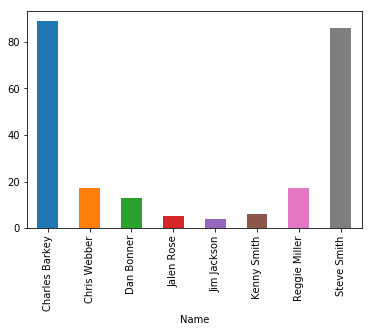

In [68]:
#using bar chart and easily get answer that Charles Barkey has the greatest range of test grade because he/she miss exams.
aaa.plot.bar();

In [73]:
#Natan's third question: Which test had the highest grades? 
#Groupby the subject.
bbb=nn2['Scores'].groupby(nn2['Subject'])

In [75]:
#using max function to get highest grade chart
bbb1=bbb.max()
bbb1

Subject
Test 1    97.0
Test 2    91.0
Test 3    94.0
Test 4    95.0
Name: Scores, dtype: float64

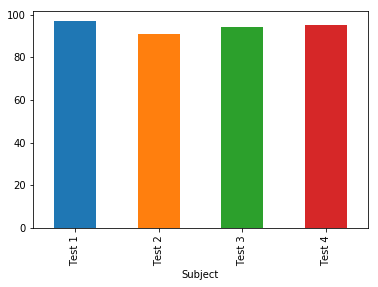

In [78]:
#using bar chart and get that Test 1 has the highest grade which is 97
bbb1.plot.bar();

***Task 3***

In [82]:
#using Jeeho's dataset and creating csv file then uploading to GitHub
jj=pd.read_csv('https://raw.githubusercontent.com/ak47m1a1/DBDA-python/master/Jeeho.csv')
jj

,User ID,Sports,Religious,Nature,Theater,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [88]:
#using melt function change wide format to long format
jj1=pd.melt(jj,id_vars=['User ID'],value_vars=['Sports','Religious','Nature','Theater','Shopping','Picnic'])
jj1.head()

,User ID,variable,value
0,User 1,Sports,2
1,User 2,Sports,2
2,User 3,Sports,2
3,User 4,Sports,2
4,User 5,Sports,2


In [91]:
#rename columns' variable and value names
jj1.rename(columns={'variable':'Subject', 'value':'Review Number'},inplace=True)
jj1.head()

,User ID,Subject,Review Number
0,User 1,Sports,2
1,User 2,Sports,2
2,User 3,Sports,2
3,User 4,Sports,2
4,User 5,Sports,2


In [98]:
#Jeeho's question: which class among the six has the highest frequency of reviews by the user.
#Using groupby function to groupby subject, and sum function to get the frequency
jj2=jj1['Review Number'].groupby(jj1['Subject'])
jj3=jj2.sum()
jj3

Subject
Nature       383
Picnic       385
Religious    355
Shopping     358
Sports        10
Theater      386
Name: Review Number, dtype: int64

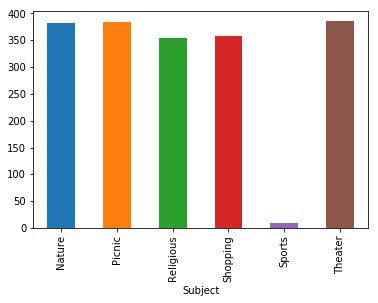

In [99]:
#Using bar chart and get the answer that Theater has the highest frequency of reviews by the user.
jj3.plot.bar();